In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [20]:
# set seed in order to reproduce the results
# This seed evolves. It means that the results will be 
# different if you run the code again, but always in the same order.
torch.manual_seed(1)

In [21]:
# It generates a tensor with 2 dimensions and 10 elements
# the values are generated based on a uniforn distribution [0, 1)
#torch.manual_seed(1)
X = torch.rand(10,1) * 2
X

tensor([[1.5153],
        [0.5586],
        [0.8061],
        [1.4694],
        [0.0586],
        [1.5997],
        [0.7943],
        [1.5087],
        [1.1390],
        [0.8776]])

In [22]:
X.shape

torch.Size([10, 1])

In [23]:
y = 2 * X + 1 + torch.randn(10,1) * 0.1
y

tensor([[4.1164],
        [2.1878],
        [2.5782],
        [3.8115],
        [0.9976],
        [4.2019],
        [2.5123],
        [4.1572],
        [3.2456],
        [2.7839]])

In [25]:
def create_dataset():
    torch.manual_seed(1)
    X = torch.rand(10,1) * 2
    y = 2 * X + 1 + torch.randn(10, 1) * 0.2
    return X, y

In [27]:
X, y = create_dataset()

In [33]:
class SimpleNN(nn.Module):
    '''
    '''
    def __init__(self):
          super().__init__()
          self.hidden = nn.Linear(1, 10)
          self.relu = nn.ReLU()
          self.output = nn.Linear(10, 1)
    def forward(self, x):
         return self.output(self.relu(self.hidden(x)))
            

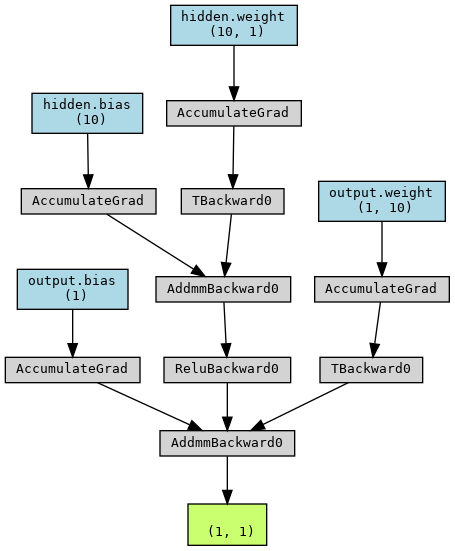

In [51]:
from torchviz import make_dot

# Define your model
model = SimpleNN()

# Dummy input tensor (size matches the input layer size)
x = torch.rand(1, 1)

# Forward pass to create a computation graph
y = model(x)

# Visualize the graph
make_dot(y, params=dict(model.named_parameters())).render("model_architecture", format="png")

# Display in notebook (if using Jupyter)
from IPython.display import Image
Image("model_architecture.png")


In [53]:
from torch.utils.tensorboard import SummaryWriter

# Initialize TensorBoard writer
writer = SummaryWriter()

# Add model graph to TensorBoard
x = torch.rand(1, 1)
writer.add_graph(model, x)
writer.close()

In [36]:
model = SimpleNN()
model

SimpleNN(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# Initialize model, loss, and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [42]:
# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.1795
Epoch [20/100], Loss: 0.1607
Epoch [30/100], Loss: 0.1439
Epoch [40/100], Loss: 0.1291
Epoch [50/100], Loss: 0.1163
Epoch [60/100], Loss: 0.1050
Epoch [70/100], Loss: 0.0949
Epoch [80/100], Loss: 0.0860
Epoch [90/100], Loss: 0.0781
Epoch [100/100], Loss: 0.0712


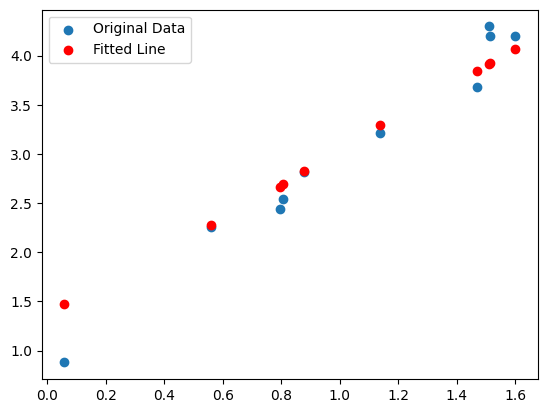

In [44]:
# Visualizing the results
model.eval()
with torch.no_grad():
    predictions = model(X)
    
plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.scatter(X.numpy(), predictions.numpy(), label='Fitted Line', color='red')
plt.legend()
plt.show()